Context
The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

Content
Full tweet texts are provided with their labels for training data.
Mentioned users' username is replaced with @user.

Acknowledgements
Dataset is provided by Analytics Vidhya


In [152]:
# Importing required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Set the default style for plots
plt.style.use('classic')
colors = plt.rcParams["axes.prop_cycle"]()

In [153]:
# Reading training and testing data files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [154]:
# Concatenating both training and testing data into a single file for easier exploration
data = pd.concat([test.assign(ind="test"), train.assign(ind="train")])

In [155]:
#Retrieving columns
data.columns

Index(['id', 'tweet', 'ind', 'label'], dtype='object')

In [156]:
# Retrieving the first five observations using the head function
data.head()

,id,tweet,ind,label
0,31963,#studiolife #aislife #requires #passion #dedic...,test,NaN
1,31964,@user #white #supremacists want everyone to s...,test,NaN
2,31965,safe ways to heal your #acne!! #altwaystohe...,test,NaN
3,31966,is the hp and the cursed child book up for res...,test,NaN
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",test,NaN


In [157]:
# Retrieving random samples of data file
data.sample(frac=0.50)

,id,tweet,ind,label
5848,37811,white girls who've had black men is this true ...,test,NaN
16368,16369,@user who's posting this? hrc always calls hi...,train,0.0
3638,35601,3 days getting organised &amp; moving furnitur...,test,NaN
7555,39518,#familybusiness attack bull chase: when you ...,test,NaN
22865,22866,@user @user snow white --&gt; open! --&gt; #sl...,train,0.0
...,...,...,...,...
25134,25135,you only talk to me when no one is around. #...,train,0.0
22,31985,my mind is like ððð½ð but my body l...,test,NaN
6,7,@user camping tomorrow @user @user @user @use...,train,0.0
23230,23231,vegan cheat cake in the oven!,train,0.0


In [158]:
# Retrieving the last five observations using the tail function
data.tail()

,id,tweet,ind,label
31957,31958,ate @user isz that youuu?ðððððð...,train,0.0
31958,31959,to see nina turner on the airwaves trying to...,train,0.0
31959,31960,listening to sad songs on a monday morning otw...,train,0.0
31960,31961,"@user #sikh #temple vandalised in in #calgary,...",train,1.0
31961,31962,thank you @user for you follow,train,0.0


In [159]:
# tweets that are non-racist or non-sexist
sum(data["label"] == 0)

29720

In [160]:
# tweets that are racist or sexist
sum(data["label"] == 1)

2242

In [161]:
# Checking for missing values
data.isnull().sum()

id           0
tweet        0
ind          0
label    17197
dtype: int64

<AxesSubplot:>

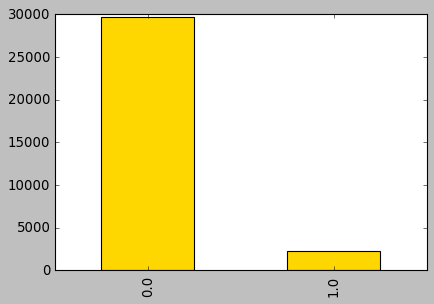

In [162]:
data['label'].value_counts().plot.bar(color = 'gold', figsize = (6, 4))

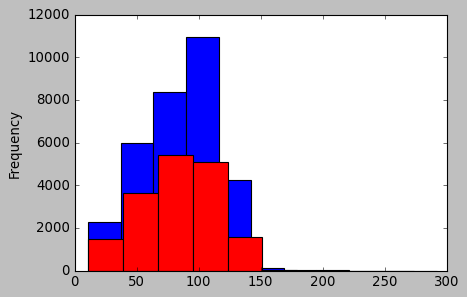

In [163]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'blue', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'red', figsize = (6, 4))

In [164]:
train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [165]:
train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

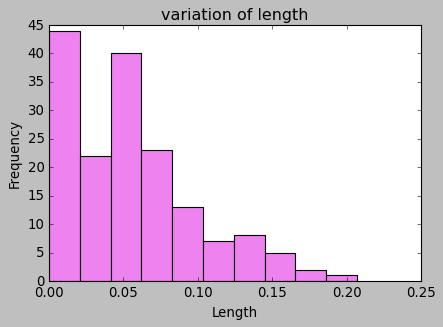

In [166]:
train.groupby('len').mean()['label'].plot.hist(color = 'violet', figsize = (6, 4),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

# Data Cleaning 

In [167]:
#install tweet-preprocessor to clean tweets
!pip install tweet-preprocessor

In [168]:
# remove special characters using the regular expression library
import re

#set up punctuations we want to be replaced
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(/)|(:).")

In [169]:
import preprocessor as p

# custum function to clean the dataset (combining tweet_preprocessor and reguar expression)
def clean_tweets(df):
  tempArr = []
  for line in df:
    # send to tweet_processor
    tmpL = p.clean(line)
    # remove puctuation
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all tweets to lower cases
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

In [170]:
# de-concatenating our data file further analysis
test, train = data[data["ind"].eq("test")], data[data["ind"].eq("train")]

In [171]:
# clean training data
train_tweet = clean_tweets(train["tweet"])
train_tweet = pd.DataFrame(train_tweet)

In [172]:
# append cleaned tweets to the training data
train["clean_tweet"] = train_tweet

# compare the cleaned and uncleaned tweets
train.head(10)

<ipython-input-172-936f459db3b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["clean_tweet"] = train_tweet


,id,tweet,ind,label,clean_tweet
0,1,@user when a father is dysfunctional and is s...,train,0.0,when a father is dysfunctional and is so selfi...
1,2,@user @user thanks for #lyft credit i can't us...,train,0.0,thanks for credit i cant use cause they dont o...
2,3,bihday your majesty,train,0.0,bihday your majesty
3,4,#model i love u take with u all the time in ...,train,0.0,i love u take with u all the time in ur
4,5,factsguide: society now #motivation,train,0.0,factsguide society now
5,6,[2/2] huge fan fare and big talking before the...,train,0.0,2 2 huge fan fare and big talking before they ...
6,7,@user camping tomorrow @user @user @user @use...,train,0.0,camping tomorrow danny
7,8,the next school year is the year for exams.ð...,train,0.0,the next school year is the year for exams can...
8,9,we won!!! love the land!!! #allin #cavs #champ...,train,0.0,we won love the land
9,10,@user @user welcome here ! i'm it's so #gr...,train,0.0,welcome here im its so


In [173]:
# clean the test data and append the cleaned tweets to the test data
test_tweet = clean_tweets(test["tweet"])
test_tweet = pd.DataFrame(test_tweet)
# append cleaned tweets to the training data
test["clean_tweet"] = test_tweet

# compare the cleaned and uncleaned tweets
test.tail()

<ipython-input-173-7a3a68f814c2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["clean_tweet"] = test_tweet


,id,tweet,ind,label,clean_tweet
17192,49155,thought factory: left-right polarisation! #tru...,test,NaN,thought factory left right polarisation &gt3
17193,49156,feeling like a mermaid ð #hairflip #neverre...,test,NaN,feeling like a mermaid
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,test,NaN,today in omg &amp used words like assets&ampli...
17195,49158,"happy, at work conference: right mindset leads...",test,NaN,happy at work conference right mindset leads t...
17196,49159,"my song ""so glad"" free download! #shoegaze ...",test,NaN,my song so glad free download


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

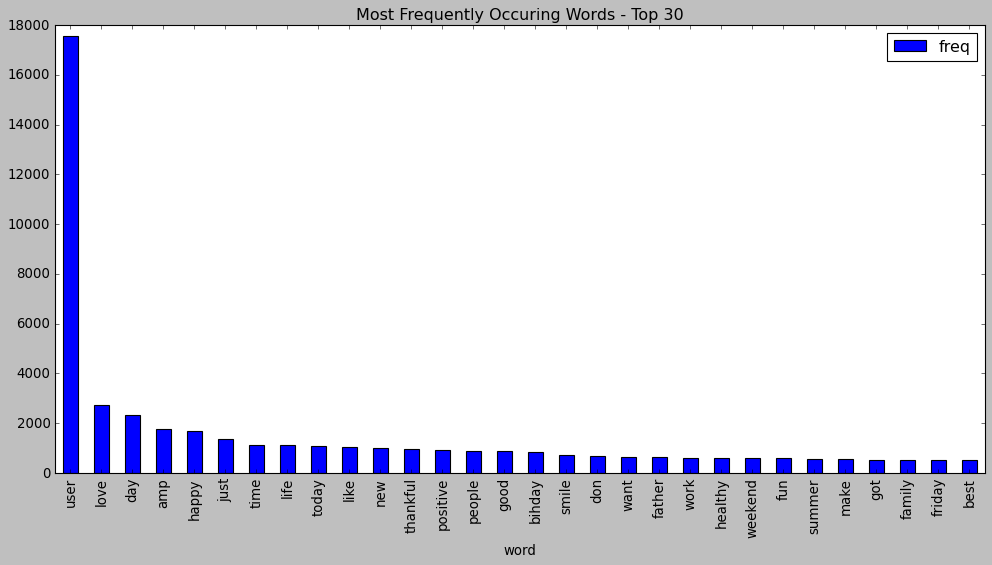

In [174]:
from sklearn.feature_extraction.text import CountVectorizer

# Plotting top 30 most frequently occuring words
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

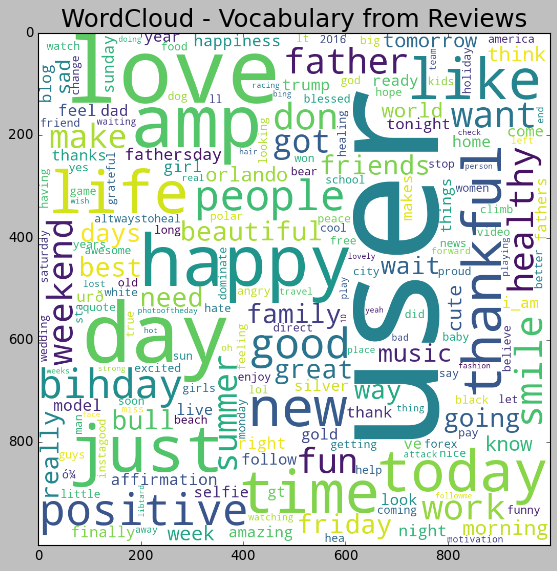

In [175]:
from wordcloud import WordCloud

# wordclouds on vocabularies
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

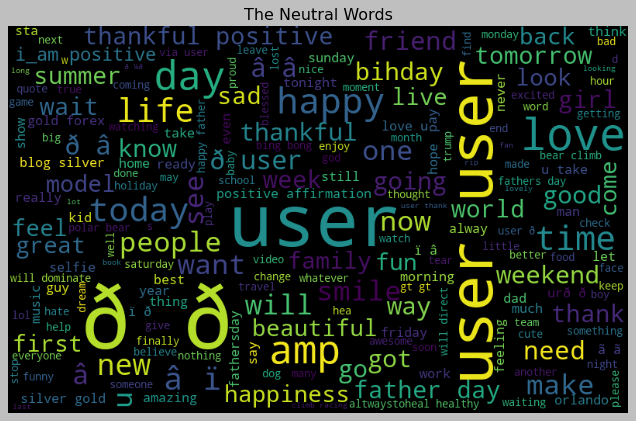

In [176]:
# Wordclouds on normal vocabularies

normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

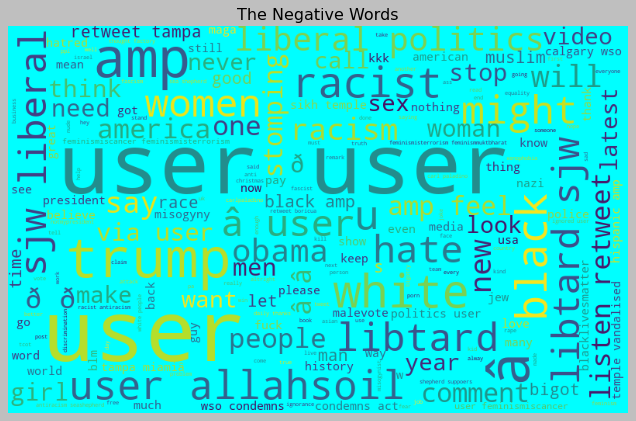

In [177]:
# Wordcloud on negative vocabualries

negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [178]:
#importing the train and test split library
from sklearn.model_selection import train_test_split

# extract the labels from the train data
y = train.label.values

# using 70% for the training and 30% for the testing
x_train, x_test, y_train, y_test = train_test_split(train.clean_tweet.values, y, stratify=y, random_state=1, test_size=0.3, shuffle=True)

# Vectorize Tweets Using CountVectorizer

CountVectorizer Example

In [140]:
from sklearn.feature_extraction.text import CountVectorizer

In [141]:
documents = ["This is Import Data's Youtube channel",
             "Data science is my passion and it is fun!",
             "Please subscribe to my channel"]

# initializing the countvectorizer
vectorizer = CountVectorizer()

# tokenize and make the document into a matrix
document_term_matrix = vectorizer.fit_transform(documents)

# check the result
pd.DataFrame(document_term_matrix.toarray(), columns = vectorizer.get_feature_names())

,and,channel,data,fun,import,is,it,my,passion,please,science,subscribe,this,to,youtube
0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,1
1,1,0,1,1,0,2,1,1,1,0,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0


In [142]:
# vectorize tweets for model building
vectorizer = CountVectorizer(binary=True, stop_words='english')

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test))

# transform documents to document-term matrix
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)

# Model Application¶

Support Vetor Machine (SVM)

In [143]:
# Support vector library
from sklearn import svm

# Creating the support vector classifier
svm = svm.SVC(kernel = 'linear', probability=True)

# fit the SVC model based on the given training data
prob = svm.fit(x_train_vec, y_train)

In [144]:
# perform classification and prediction on samples in x_test
y_pred_svm = svm.predict(x_test_vec)

In [145]:
# Predicting probabilities
svm.predict_proba(x_test_vec[0:10])

array([[0.95935691, 0.04064309],
       [0.97770643, 0.02229357],
       [0.95493555, 0.04506445],
       [0.92521975, 0.07478025],
       [0.83747264, 0.16252736],
       [0.99715129, 0.00284871],
       [0.94415531, 0.05584469],
       [0.98853897, 0.01146103],
       [0.93811336, 0.06188664],
       [0.95366324, 0.04633676]])

In [146]:
#importing Library for accuracy score
from sklearn.metrics import accuracy_score

# Model accuracy score
print("Accuracy score for SVC is: ", accuracy_score(y_test, y_pred_svm) * 100, '%')

Accuracy score for SVC is:  94.86912086766085 %


Logistic Regression

In [147]:
# Importing Logistic Regression library
from sklearn.linear_model import LogisticRegression

# Creating the object of the Logisitics Regression model
model = LogisticRegression(solver="liblinear", random_state=42)

In [148]:
# Fitting our model
model.fit(x_train_vec, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [149]:
# Predicting probabilities
model.predict_proba(x_test_vec)

array([[0.97451696, 0.02548304],
       [0.98073684, 0.01926316],
       [0.95567169, 0.04432831],
       ...,
       [0.98721219, 0.01278781],
       [0.99277082, 0.00722918],
       [0.22434625, 0.77565375]])

In [150]:
# train and test accuracy score 
print("Accuracy of train:", model.score(x_train_vec, y_train))
print("Accuracy of test:", model.score(x_test_vec,y_test))

Accuracy of train: 0.9679971394091091
Accuracy of test: 0.9500469287725519
